<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
C:\Users\marce\AppData\Local\Temp\ipykernel_19576\2933855284.py:51: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Linie przepływu dla cieczy nielepkiej ($\\nabla^2\psi = 0$)')


Iteracja: 0, Maksymalna zmiana: 2.00e-01
Iteracja: 500, Maksymalna zmiana: 2.85e-04
Iteracja: 1000, Maksymalna zmiana: 1.21e-04
Iteracja: 1500, Maksymalna zmiana: 5.91e-05
Iteracja: 2000, Maksymalna zmiana: 3.12e-05
Iteracja: 2500, Maksymalna zmiana: 1.79e-05
Iteracja: 3000, Maksymalna zmiana: 1.11e-05
Iteracja: 3500, Maksymalna zmiana: 7.36e-06
Iteracja: 4000, Maksymalna zmiana: 5.15e-06
Iteracja: 4500, Maksymalna zmiana: 3.73e-06
Iteracja: 5000, Maksymalna zmiana: 2.76e-06
Iteracja: 5500, Maksymalna zmiana: 2.07e-06
Iteracja: 6000, Maksymalna zmiana: 1.57e-06
Iteracja: 6500, Maksymalna zmiana: 1.19e-06
Iteracja: 7000, Maksymalna zmiana: 9.15e-07
Iteracja: 7500, Maksymalna zmiana: 7.04e-07
Iteracja: 8000, Maksymalna zmiana: 5.43e-07
Iteracja: 8500, Maksymalna zmiana: 4.20e-07
Iteracja: 9000, Maksymalna zmiana: 3.25e-07
Iteracja: 9500, Maksymalna zmiana: 2.52e-07
Iteracja: 10000, Maksymalna zmiana: 1.96e-07
Iteracja: 10500, Maksymalna zmiana: 1.52e-07
Iteracja: 11000, Maksymalna zmiana

C:\Users\marce\AppData\Local\Temp\ipykernel_19576\2933855284.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.xlabel('x'); plt.ylabel('y'); plt.gca().set_aspect('equal', adjustable='box'); plt.grid(True); plt.legend()


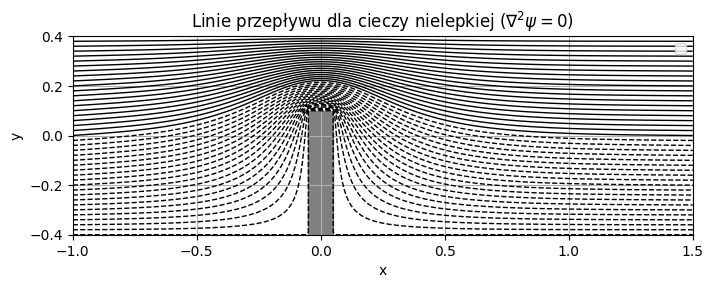

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
NX, NY = 251, 81
I_OFFSET, J_OFFSET = 100, 40
DZ = 0.01
A = 1.0
IK, JK = 5, 10
Y1, Y2 = -40 * DZ, 40 * DZ
MAX_ITER, CONV_TOLERANCE = 30000, 1e-7
I_MIN_OBS, I_MAX_OBS, J_MAX_OBS = -IK + I_OFFSET, IK + I_OFFSET, JK + J_OFFSET

# Inicjalizacja
psi = np.zeros((NX, NY))
y_vals = (np.arange(NY) - J_OFFSET) * DZ
psi[0, :], psi[NX-1, :] = A * y_vals, A * y_vals
psi[:, NY-1], psi[:, 0] = A * Y2, A * Y1
psi[I_MIN_OBS:I_MAX_OBS+1, :J_MAX_OBS+1] = A * Y1

# Maska logiczna
is_fluid = np.full((NX, NY), True, dtype=bool)
is_fluid[I_MIN_OBS:I_MAX_OBS+1, :J_MAX_OBS+1] = False
is_fluid_interior = is_fluid[1:-1, 1:-1]

# Główna pętla
for it in range(MAX_ITER):
    psi_old = psi.copy()

    # Wektorowa aktualizacja dla równania Laplace'a
    update = 0.25 * (psi[2:, 1:-1] + psi[:-2, 1:-1] + psi[1:-1, 2:] + psi[1:-1, :-2])
    
    # Zastosowanie maski
    psi[1:-1, 1:-1][is_fluid_interior] = update[is_fluid_interior]

    if it % 500 == 0:
        delta = np.max(np.abs(psi - psi_old))
        print(f"Iteracja: {it}, Maksymalna zmiana: {delta:.2e}")
        if delta < CONV_TOLERANCE:
            print(f"\nOsiągnięto zbieżność w iteracji {it}.")
            break
else:
    print("\nOsiągnięto maksymalną liczbę iteracji.")

# --- Rysowanie wykresu ---
plt.figure(figsize=(8, 6))
x_coords = (np.arange(NX) - I_OFFSET) * DZ
y_coords = (np.arange(NY) - J_OFFSET) * DZ
plt.contour(x_coords, y_coords, psi.T, levels=40, colors='k', linewidths=1)
plt.fill_between(x_coords[I_MIN_OBS:I_MAX_OBS+1], Y1, y_coords[J_MAX_OBS], color='gray')
plt.title('Linie przepływu dla cieczy nielepkiej ($\\nabla^2\psi = 0$)')
plt.xlabel('x'); plt.ylabel('y'); plt.gca().set_aspect('equal', adjustable='box'); plt.grid(True); plt.legend()
plt.show()